In [19]:
import numpy as np
import numpy.linalg as linalg

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
def franke_function(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)     # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

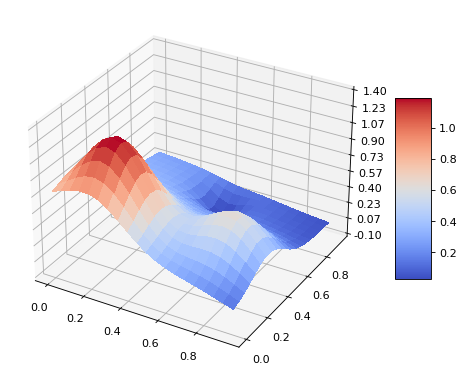

In [21]:
# 3D plot of the Franke Function

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [72]:
# Setting data

np.random.seed(100)

deg = 5
N = 100

x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = franke_function(x, y)
X = create_X(x, y, deg)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ordinary least squares
MSE: 
 - trained: 7.430321478021568e-17 
 - tested: 0.07672888051414703
R2 score: 
 - trained: 0.9999999999999996 
 - tested: 0.5723099031356518


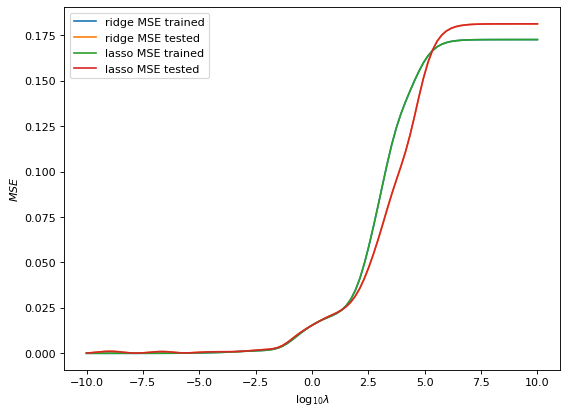

In [93]:
# OLS method

ols_reg = LinearRegression()
ols_reg.fit(X_train_scaled, z_train)

ols_ztilde_trained = ols_reg.predict(X_train_scaled)
ols_ztilde_tested = ols_reg.predict(X_test_scaled)

# mean_squared_error, r2_score
ols_mse = np.zeros((2, 1))
ols_r2 = np.zeros((2, 1))

ols_mse[0, 0] = mean_squared_error(z_train, ols_ztilde_trained)
ols_mse[1, 0] = mean_squared_error(z_test, ols_ztilde_tested)
ols_r2[0, 0] = r2_score(z_train, ols_ztilde_trained)
ols_r2[1, 0] = r2_score(z_test, ols_ztilde_tested)

# Ridge and Lasso regresion for various lambda

n_lambdas = 100
lambda_vals = np.logspace(-10, 10, n_lambdas)

ridge_mse = np.zeros((2, n_lambdas))
ridge_r2 = np.zeros((2, n_lambdas))
lasso_mse = np.zeros((2, n_lambdas))
lasso_r2 = np.zeros((2, n_lambdas))

for i, lmd in enumerate(lambda_vals):
    ridge_reg = Ridge(alpha=lmd)
    ridge_reg.fit(X_train_scaled, z_train)
    
    ridge_ztilde_trained = ridge_reg.predict(X_train_scaled)
    ridge_ztilde_tested = ridge_reg.predict(X_test_scaled)
    
    ridge_mse[0, i] = mean_squared_error(z_train, ridge_ztilde_trained)
    ridge_mse[1, i] = mean_squared_error(z_test, ridge_ztilde_tested)
    ridge_r2[0, i] = r2_score(z_train, ridge_ztilde_trained)
    ridge_r2[1, i] = r2_score(z_test, ridge_ztilde_tested)

    
    lasso_reg = Ridge(alpha=lmd)
    lasso_reg.fit(X_train_scaled, z_train)
    
    lasso_ztilde_trained = lasso_reg.predict(X_train_scaled)
    lasso_ztilde_tested = lasso_reg.predict(X_test_scaled)
    
    lasso_mse[0, i] = mean_squared_error(z_train, lasso_ztilde_trained)
    lasso_mse[1, i] = mean_squared_error(z_test, lasso_ztilde_tested)
    lasso_r2[0, i] = r2_score(z_train, lasso_ztilde_trained)
    lasso_r2[1, i] = r2_score(z_test, lasso_ztilde_tested)

print("ordinary least squares")
print(f"MSE: \n - trained: {ols_mse[0, 0]} "+
      f"\n - tested: {ols_mse[1, 0]}")
print(f"R2 score: \n - trained: {ols_r2[0, 0]} "+
      f"\n - tested: {ols_r2[1, 0]}")


plt.figure(1, figsize=(8, 6), dpi=80)

plt.plot(np.log10(lambda_vals), ridge_mse[0, :], label="ridge MSE trained")
plt.plot(np.log10(lambda_vals), ridge_mse[1, :], label="ridge MSE tested")
plt.plot(np.log10(lambda_vals), lasso_mse[0, :], label="lasso MSE trained")
plt.plot(np.log10(lambda_vals), lasso_mse[1, :], label="lasso MSE tested")
plt.xlabel(r"$\log_{10}\lambda$")
plt.ylabel(r"$MSE$")
plt.legend()

plt.show()


In [84]:
# Complexity test for Ridge regression

n_lambdas = 5
lambda_vals = np.logspace(-4, 1, n_lambdas)

deg_vals = np.arange(1, 25)
n_deg = len(deg_vals)

ridge_mse_test = np.zeros((n_lambdas, n_deg))
ridge_mse_train = np.zeros((n_lambdas, n_deg))

for i, lmd in enumerate(lambda_vals):
    for j, pol_deg in enumerate(deg_vals):
        X = create_X(x, y, pol_deg)
        
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        ridge_reg = Ridge(alpha=lmd)
        ridge_reg.fit(X_train_scaled, z_train)
        
        ridge_ztilde_trained = ridge_reg.predict(X_train_scaled)
        ridge_ztilde_tested = ridge_reg.predict(X_test_scaled)

        ridge_mse_test[i, j] = mean_squared_error(z_test, ridge_ztilde_tested)
        ridge_mse_train[i, j] = mean_squared_error(z_train, ridge_ztilde_trained)


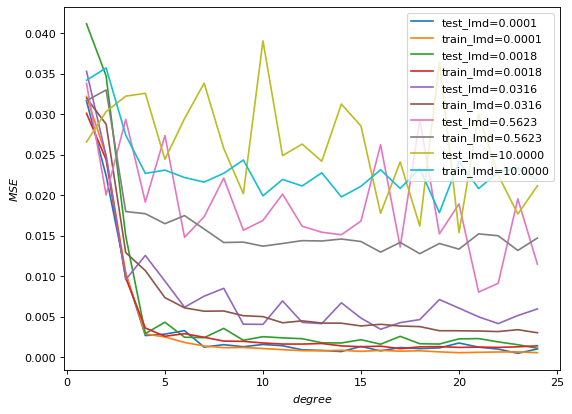

In [85]:
plt.figure(1, figsize=(8, 6), dpi=80)

for i, lmd in enumerate(lambda_vals):
    plt.plot(deg_vals, ridge_mse_test[i, :], label=f"test_lmd={lmd:.4f}")
    plt.plot(deg_vals, ridge_mse_train[i, :], label=f"train_lmd={lmd:.4f}")
    
plt.xlabel(r"$degree$")
plt.ylabel(r"$MSE$")
plt.legend()

plt.show()

In [91]:
import warnings
warnings.filterwarnings('ignore')

# Complexity test for Lasso regression

n_lambdas = 5
lambda_vals = np.logspace(-4, 1, n_lambdas)

deg_vals = np.arange(1, 25)
n_deg = len(deg_vals)

lasso_mse_test = np.zeros((n_lambdas, n_deg))
lasso_mse_train = np.zeros((n_lambdas, n_deg))

for i, lmd in enumerate(lambda_vals):
    for j, pol_deg in enumerate(deg_vals):
        X = create_X(x, y, pol_deg)
        
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        lasso_reg = Lasso(alpha=lmd)
        lasso_reg.fit(X_train_scaled, z_train)
        
        lasso_ztilde_trained = lasso_reg.predict(X_train_scaled)
        lasso_ztilde_tested = lasso_reg.predict(X_test_scaled)

        lasso_mse_test[i, j] = mean_squared_error(z_test, lasso_ztilde_tested)
        lasso_mse_train[i, j] = mean_squared_error(z_train, lasso_ztilde_trained)


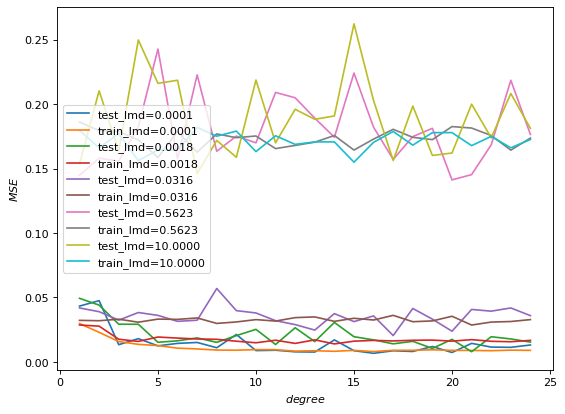

In [92]:
plt.figure(1, figsize=(8, 6), dpi=80)

for i, lmd in enumerate(lambda_vals):
    plt.plot(deg_vals, lasso_mse_test[i, :], label=f"test_lmd={lmd:.4f}")
    plt.plot(deg_vals, lasso_mse_train[i, :], label=f"train_lmd={lmd:.4f}")
    
plt.xlabel(r"$degree$")
plt.ylabel(r"$MSE$")
plt.legend()

plt.show()